In [1]:
import openslide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2 as cv 

plt.style.use("ggplot")

In [2]:
pred_slide_kM = openslide.open_slide("/home/heckerm/bachelor/generate_slide/slide_K5774_19_ML_fm_keypoint.tif")
pred_slide_nM = openslide.open_slide("/home/heckerm/bachelor/generate_slide/slide_K5774_19_ML_fm.tif")
ck_slide = openslide.open_slide("/home/heckerm/data/CK/K5774_19_CK.mrxs")

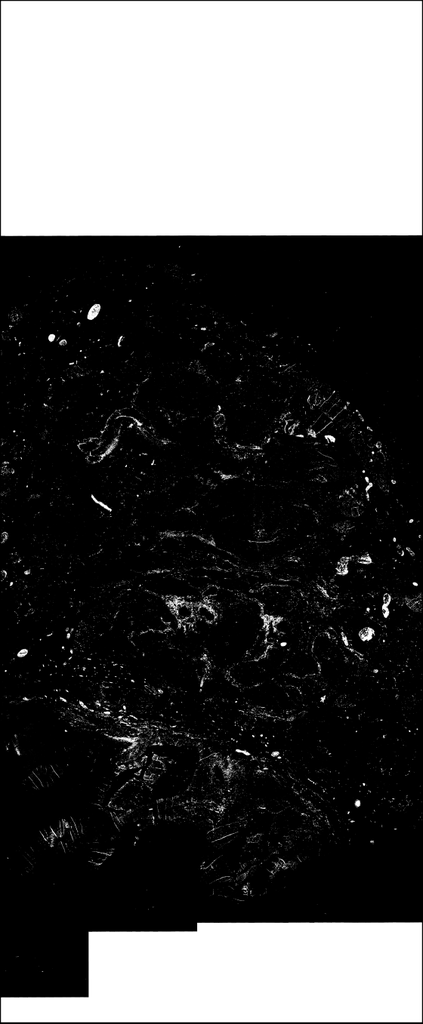

In [3]:
pred_slide_kM.get_thumbnail((1024,1024))

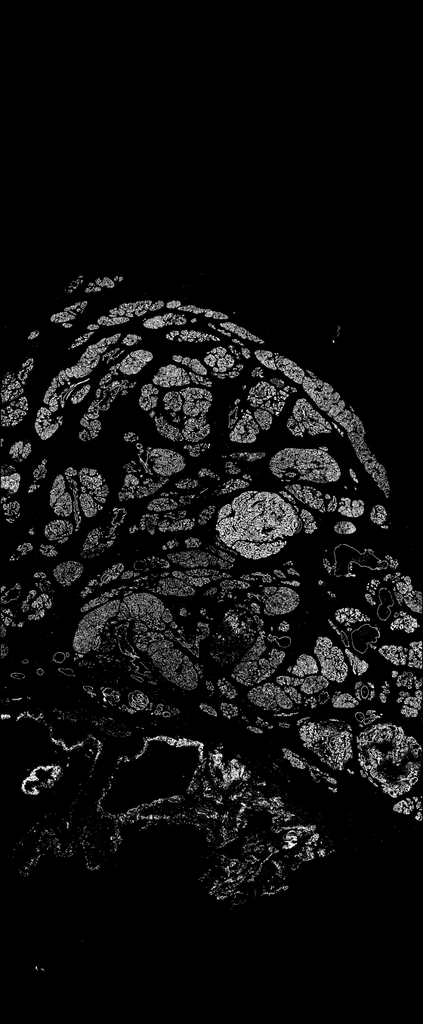

In [4]:
pred_slide_nM.get_thumbnail((1024,1024))

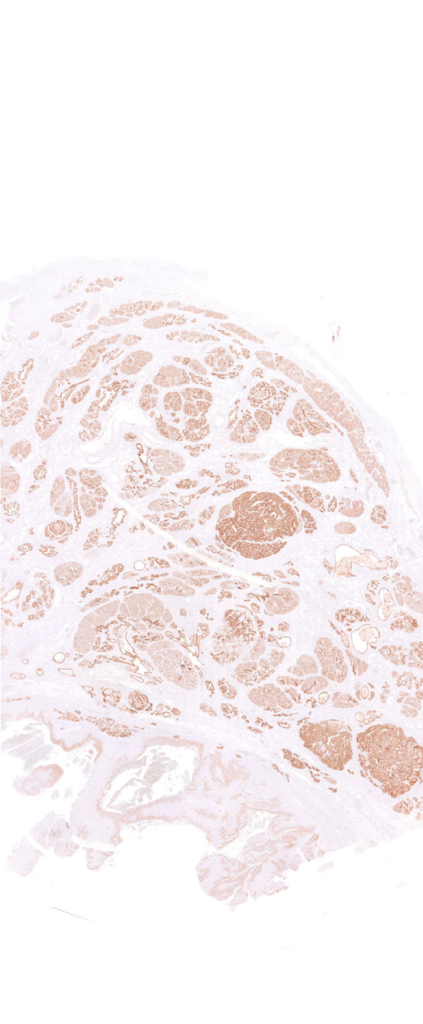

In [5]:
ck_slide.get_thumbnail((1024,1024))

In [6]:
array_ck = np.array(ck_slide.get_thumbnail((1024,1024)).convert("L"))

In [7]:
array_pred_nM = np.array(pred_slide_nM.get_thumbnail((1024,1024)).convert("L"))
array_pred_kM = np.array(pred_slide_kM.get_thumbnail((1024,1024)).convert("L"))

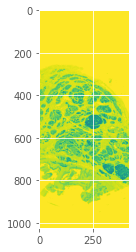

In [8]:
plt.imshow(array_ck)
plt.show()

In [9]:
range_array = cv.inRange(array_ck, 50, 238) #Thresholding

In [10]:
range_array = range_array.astype(bool)
array_pred_nM = array_pred_nM.astype(bool)
array_pred_kM = array_pred_kM.astype(bool)

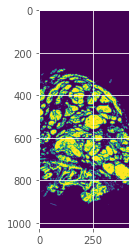

In [11]:
plt.imshow(range_array)
plt.show()

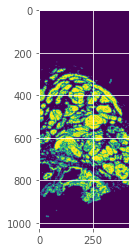

In [12]:
plt.imshow(array_pred_nM)
plt.show()

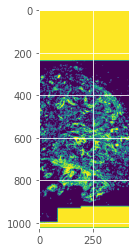

In [13]:
plt.imshow(array_pred_kM)
plt.show()

In [14]:
unique, counts = np.unique(range_array, return_counts=True)
print(unique, counts)

[False  True] [332626 100526]


In [15]:
unique, counts = np.unique(array_pred_nM, return_counts=True)
print(unique, counts)

[False  True] [327031 106121]


In [16]:
overlap = array_pred_nM * range_array 
union = array_pred_nM + range_array 

IOU = overlap.sum()/float(union.sum())
IOU

0.6785830327842219

In [17]:
overlap = array_pred_kM * range_array 
union = array_pred_kM + range_array 

IOU = overlap.sum()/float(union.sum())
IOU

0.12727533376462977